#### Matplotlib

Es la librería de visualización más utilizada.
- Interfaz orientada a objetos

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

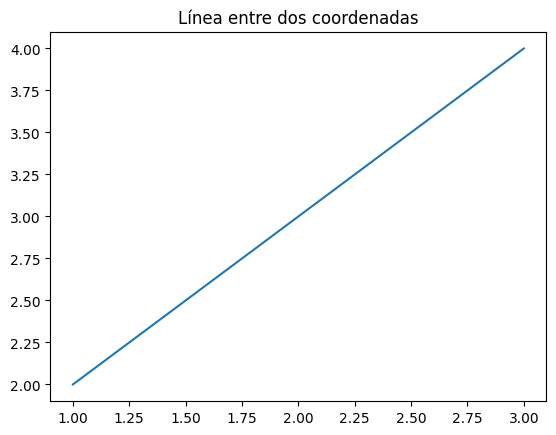

In [2]:
# Primeros pasos, graficando una línea que una los puntos de dos coordenadas
fig, ax = plt.subplots()
ax.set_title("Línea entre dos coordenadas")

# x, y
ax.plot([1, 3], [2, 4])

In [3]:
# Cambiar el estilo de los graficos de matplotlib
mpl.style.use("bmh")

In [4]:
# crear un dataframe en base a una URL, sobre precipitaciones
url = "https://raw.githubusercontent.com/xlisouski/DataCoder/main/pune_1965_to_2002.csv"
df_lluvias = pd.read_csv(url)

In [5]:
# Definimos la columna Year como el index del dataframe
df_lluvias.index = df_lluvias["Year"]
df_lluvias = df_lluvias.drop("Year", axis="columns")
df_lluvias.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [6]:
# Definimos los ejes que quiero graficar
x = df_lluvias.index
y = df_lluvias.sum(axis="columns")
# print(x,y)

(1965.0, 2002.0)

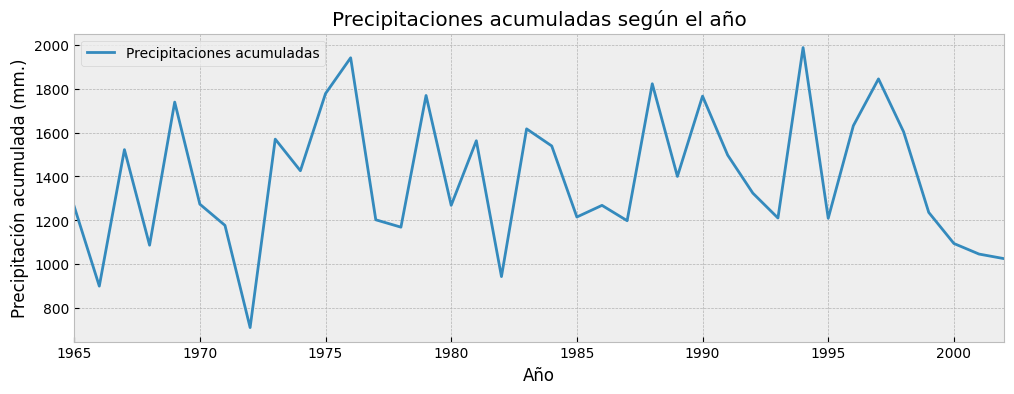

In [7]:
# Crear grafico
fig, ax = plt.subplots(figsize=(12, 4))  # definimos el tamaño de la grafica con figsize
ax.plot(x, y, label="Precipitaciones acumuladas")
ax.set_title("Precipitaciones acumuladas según el año")
ax.set_xlabel("Año")
ax.set_ylabel("Precipitación acumulada (mm.)")
ax.legend()
ax.set_xlim(x[0], x[-1])  # limitamos la grafica, al primer y ultimo valor

In [8]:
# Exportamos la grafica al directorio Plot (es posible expertar como imagen o pdf)
fig.savefig("Plots/precipitaciones_año.png")

#### Multiples elementos

Si necesitamos resaltar ciertas características de los datos.

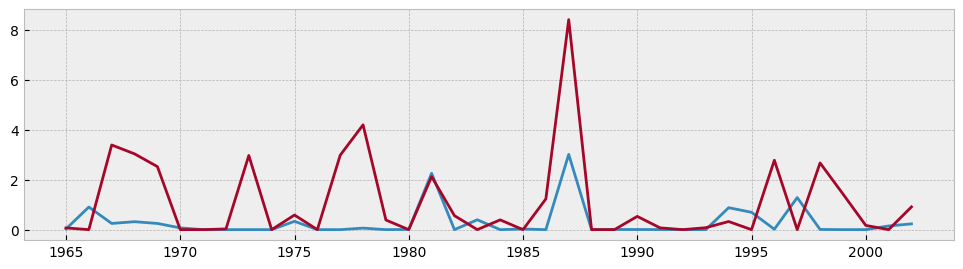

In [9]:
# Comparamos las precipitaciones de Enero y Febrero en el mismo objeto
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(df_lluvias.index, df_lluvias["Jan"], label="Precipitaciones de enero")
ax.plot(
    df_lluvias.index, df_lluvias["Feb"], label="Precipitaciones de febrero", color="C1"
)

In [10]:
# Calculamos el máximo de cada uno
maximo_enero = df_lluvias["Jan"].max()
maximo_febrero = df_lluvias["Feb"].max()

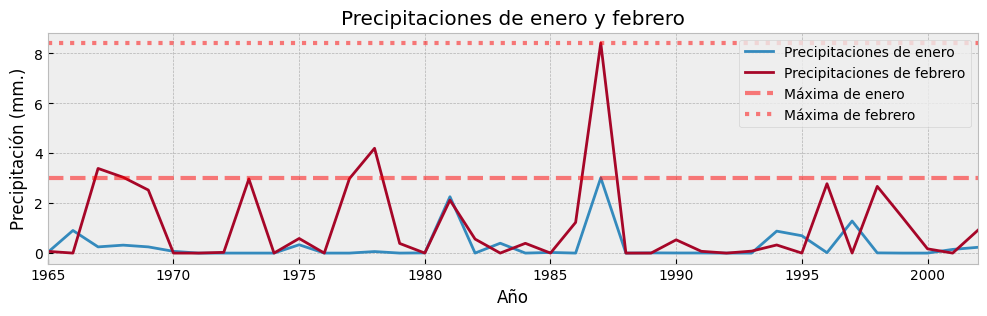

In [13]:
# Comparamos las precipitaciones de Enero y Febrero en el mismo objeto
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(df_lluvias.index, df_lluvias["Jan"], label="Precipitaciones de enero")
ax.plot(
    df_lluvias.index, df_lluvias["Feb"], label="Precipitaciones de febrero", color="C1"
)

# Con axhline graficamos líneas horizontales, podemos usarlo como maximos en cada serie
ax.axhline(
    maximo_enero,
    color="red",
    linestyle="--",
    alpha=0.5,
    linewidth=3,
    label="Máxima de enero",
)
ax.axhline(
    maximo_febrero,
    color="red",
    linestyle=":",
    alpha=0.5,
    linewidth=3,
    label="Máxima de febrero",
)

# Agregamos etiquetas
ax.set_xlabel("Año")
ax.set_ylabel("Precipitación (mm.)")
ax.set_title("Precipitaciones de enero y febrero")
ax.set_xlim(df_lluvias.index[0], df_lluvias.index[-1])
ax.legend()